## Стажировка в отдел маркетинговой аналитики Яндекс.Афиши.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

**Необходимо изучить:**

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

** Выручка измеряется в условных единицах — у.е.

**Описание данных**

В нашем распоряжении три датасета. Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

**Структура visits_log.csv**

- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

**Структура orders_log.csv**

- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

**Структура costs.csv**

- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

### Изучение общей информации о датасетах и предобработка данных

1) Импортируем необходимые для решения поставленных задач библиотеки

2) Импортируем все датасеты

3) Посмотрим на общую информацию о датасете и сам датасет, проведем необходимую предобработку данных

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Импортируем данные 
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

# установим отображение количества столбцов на экране
pd.options.display.max_columns = 40

#### Информация о визитах

Посмотрим на таблицу с визитами:

Uid — уникальный идентификатор пользователя,

Device — категория устройства пользователя,

Start Ts — дата и время начала сессии,

End Ts — дата и время окончания сессии,

Source Id — идентификатор источника перехода на сайт.

In [3]:
# Посмотрим на общую информацию о датасете и сам датасет
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 9.6+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Отлично, пропусков в данных нет, однако нужно заменить типы данных на более подходящие:

**Замена типа данных**

Для начала подберем подходящий тип данных для переменной "Source Id", чтобы сэкономить память:

In [5]:
# Для проверки мин. и макс. зн-я, подходящего для хранения с использованием каждого целочисленного подтипа, можно воспользоваться методом numpy.iinfo()
int_types = ["int8", "int16", "int32","int64","uint8", "uint16", "uint32","uint64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

In [6]:
# Посмотрим на диапазон значений данной переменной
visits['Source Id'].describe()

count    359400.000000
mean          3.750515
std           1.917116
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          10.000000
Name: Source Id, dtype: float64

In [7]:
# Приведем переменную "Source Id" к типу uint8
visits['Source Id'] = visits['Source Id'].astype('uint8')

Теперь приведем переменные 'Start Ts' и 'End Ts' к типу datetime:
    

In [8]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [9]:
visits['Device'] = visits['Device'].astype('category')

In [10]:
# Проверим замену
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  uint8         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), uint64(1), uint8(1)
memory usage: 8.9 MB


**Приведение стобцов к нижнему регистру**

In [11]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [12]:
# Подготовим список new_names с новыми именами для столбцов
new_names = ['device','end_ts', 'source_id', 'start_ts', 'uid']

In [13]:
# Переименуем столбцы таблицы, которая хранится в переменной visits
visits.set_axis(new_names, axis = 'columns', inplace = True)

In [14]:
#Убедимся, что столбцы переименованы
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

**Проверка данных на наличие дубликатов**

In [15]:
visits.duplicated().sum()

0

Отлично дубликатов нет, переходим к следующему датасету.

#### Информация о заказах

Посмотрим на таблицу с заказами:
    
Uid — уникальный идентификатор пользователя,

Buy Ts — дата и время заказа,

Revenue — сумма заказа.

In [16]:
# Посмотрим на общую информацию о датасете и сам датасет
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 984.7+ KB


In [17]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Отлично, пропусков в данных нет, однако нужно заменить типы данных на более подходящие:

**Замена типа данных**

Приведем переменную 'Buy Ts' к типу datetime:

In [18]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [19]:
#проверим замену
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Приведение стобцов к нижнему регистру**

In [20]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [21]:
# Подготовим список new_names с новыми именами для столбцов
new_names = ['buy_ts', 'revenue','uid']

In [22]:
# Переименуем столбцы таблицы, которая хранится в переменной orders
orders.set_axis(new_names, axis = 'columns', inplace = True)

In [23]:
#Убедимся, что столбцы переименованы
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

**Проверка данных на наличие дубликатов**

In [24]:
orders.duplicated().sum()

0

Отлично дубликатов нет, переходим к следующему датасету.

#### Информация о расходах на маркетинг

source_id — идентификатор рекламного источника,

dt — дата проведения рекламной кампании,

costs — расходы на эту кампанию.

In [25]:
# Посмотрим на общую информацию о датасете и сам датасет
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 49.7+ KB


In [26]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Отлично, пропусков в данных нет, однако нужно заменить типы данных на более подходящие:

**Замена типа данных**

Приведем переменную 'dt' к типу datetime:

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [28]:
#проверим замену
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.6 KB


Названия столбцов уже приведены к нижнему регистру, поэтому их мы оставим без изменений

**Проверка данных на наличие дубликатов**

In [29]:
costs.duplicated().sum()

0

**Вывод:** Мы провели необходимую предобработку данных и теперь можем переходить к следующему этапу исследования.

In [30]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [31]:
visits['start_ts'].dt.year.unique()

array([2017, 2018], dtype=int64)

In [32]:
visits['end_ts'].dt.year.unique()

array([2017, 2018], dtype=int64)

In [33]:
orders['buy_ts'].dt.year.unique()

array([2017, 2018], dtype=int64)

In [34]:
costs['dt'].dt.year.unique()

array([2017, 2018], dtype=int64)

In [35]:
costs['source_id'].value_counts()

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64

### Расчет продуктовых метрик

В данном разделе нам нужно:
    
1) Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период. Отобразить изменения метрик во времени на графиках;

2) Определить, сколько раз за день пользователи в среднем заходят на сайт. Построить график, отражающий изменения метрики во времени;

3) Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построить график распределения. Изменение продолжительности сессий во времени изучать необязательно;

4) Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике. Найти средний Retention Rate на второй месяц «жизни» когорт.

#### Изучение пользовательской активности: показатели DAU, WAU и MAU

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату:

In [36]:
visits['year']  = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].dt.week
visits['date']  = visits['start_ts'].dt.date

<ipython-input-36-98cc28c2c8a3>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['week']  = visits['start_ts'].dt.week


In [37]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее:

**Количество уникальных пользователей в месяц:**

In [38]:
MAU = visits.groupby('month').agg({'uid': 'nunique'}).mean()

In [39]:
print(" Количество уникальных пользователей в месяц (MAU): {0:.0f} человек".format(MAU[0]))

 Количество уникальных пользователей в месяц (MAU): 23228 человек


**Количество уникальных пользователей в день:**

In [40]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).mean()

In [41]:
print(" Количество уникальных пользователей в день (DAU): {0:.0f} человек".format(DAU[0]))

 Количество уникальных пользователей в день (DAU): 908 человек


**Количество уникальных пользователей в неделю:**

In [42]:
WAU = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()

In [43]:
print(" Количество уникальных пользователей в неделю (WAU): {0:.0f} человек".format(WAU[0]))

 Количество уникальных пользователей в неделю (WAU): 5716 человек


Отобразим изменение каждой метрики во времени на графиках:

**MAU:**

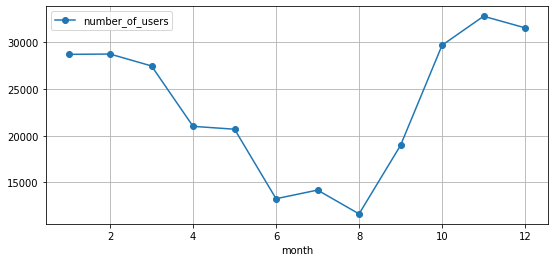

In [44]:
#Количество уникальных пользователей по месяцам
unique_users_per_month = visits.groupby('month').agg({'uid': 'nunique'})
unique_users_per_month.columns = ['number_of_users']


#Построим график
unique_users_per_month.plot(y = 'number_of_users', style='o-',  figsize=(9, 4), grid = True)
plt.show()

Исходя из графика, пик пользовательской активности приходится на ноябрь, а спад пользовательской активности наблюдается во все летние месяцы (в оснобенности, в август). Логично, что сервисы  по продаже билетов на развлекательные мероприятия, будут менее востребаваны летом, когда многие уезжают в отпуск.

Также построим графики уникального количества пользователей по дням и неделям, однако, на мой взгляд они менее наглядные и информативные, чем по месяцам.

**DAU:**

date
2017-11-24    3319
2018-05-31    1997
2017-11-25    1817
2018-02-01    1640
2018-03-26    1609
              ... 
2017-08-13     281
2017-08-05     280
2017-08-12     271
2018-03-30     131
2018-03-31       1
Name: number_of_users, Length: 364, dtype: int64


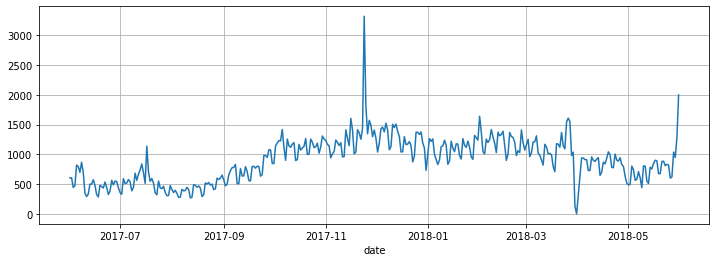

In [45]:
#Количество уникальных пользователей по дням
unique_users_per_day = visits.groupby('date').agg({'uid': 'nunique'})
unique_users_per_day.columns = ['number_of_users']
print(unique_users_per_day['number_of_users'].sort_values(ascending = False))


#Построим график
unique_users_per_day['number_of_users'].plot(y = 'number_of_users',  figsize=(12, 4), grid = True)
plt.show()

**WAU:**

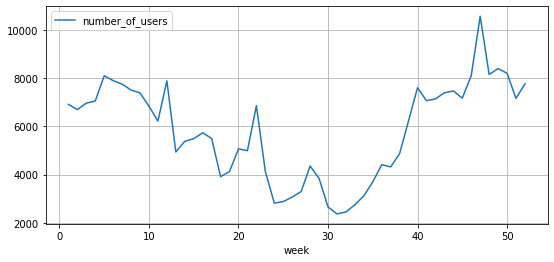

In [46]:
#Количество уникальных пользователей по неделям
unique_users_per_week = visits.groupby('week').agg({'uid': 'nunique'})
unique_users_per_week.columns = ['number_of_users']


#Построим график
unique_users_per_week.plot(y = 'number_of_users', figsize=(9, 4), grid = True)
plt.show()

Также можно посмотреть вариативность количества пользователей в определенные дни недели:

In [47]:
# Создадим отдельный столбец с названием дня недели, в который началась первая сессия
visits['day_of_week'] = visits['start_ts'].dt.day_name()

Построим график:

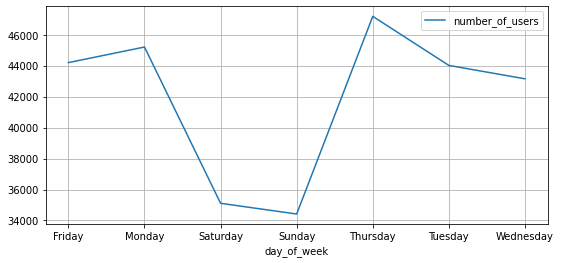

In [48]:
#Количество уникальных пользователей по дням недели
unique_users_per_number_of_week = visits.groupby('day_of_week').agg({'uid': 'nunique'})
unique_users_per_number_of_week.columns = ['number_of_users']


#Построим график
unique_users_per_number_of_week.plot(y = 'number_of_users', figsize=(9, 4), grid = True)
plt.show()

Видим, что меньше всего пользователей активны в выходные дни. Это может быть обусловлено тем, что люди заранее продумывают свои планы на отдых еще в рабочее время. А в субботу или воскресенье, как раз, посещают развлекательные мероприятия.

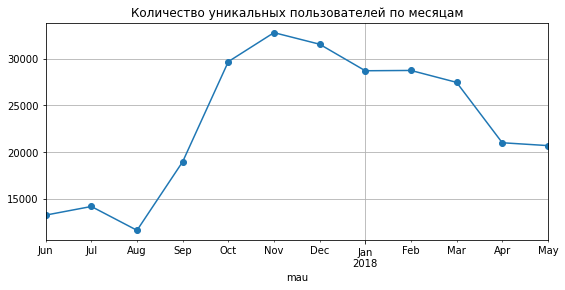

In [49]:
#Количество уникальных пользователей по месяцам
visits['mau'] = visits['start_ts'].astype('datetime64[M]') 
unique_users_per_month = visits.groupby('mau').agg({'uid': 'nunique'})
unique_users_per_month.columns = ['number_of_users']


#Построим график
unique_users_per_month.plot(y = 'number_of_users', style='o-',  figsize=(9, 4), grid = True)
plt.title('Количество уникальных пользователей по месяцам')
plt.legend().remove()
plt.show()

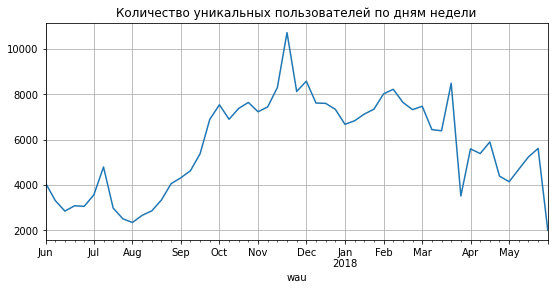

In [50]:
#Количество уникальных пользователей по дням недели
visits['wau'] = visits['start_ts'].astype('datetime64[W]') 
unique_users_per_number_of_week = visits.groupby('wau').agg({'uid': 'nunique'})
unique_users_per_number_of_week.columns = ['number_of_users']


#Построим график
unique_users_per_number_of_week.plot(y = 'number_of_users', figsize=(9, 4), grid = True)
plt.legend().remove()
plt.title('Количество уникальных пользователей по дням недели')
plt.show()

#### Расчет количества сессий, приходящихся на одного пользователя в день

In [51]:
sessions_per_user_per_day = visits.groupby('date').agg({'uid': ['count', 'nunique']})

In [52]:
sessions_per_user_per_day.columns = ['number_of_sessions','number_of_users']

In [53]:
sessions_per_user_per_day['sessions_per_user'] = (sessions_per_user_per_day['number_of_sessions'] / sessions_per_user_per_day['number_of_users'])

In [54]:
sessions_per_user_per_day['sessions_per_user'].sort_values()

date
2018-03-31    1.000000
2018-03-30    1.022901
2017-08-19    1.027397
2017-06-17    1.027439
2017-06-24    1.036585
                ...   
2017-11-29    1.141975
2018-02-01    1.145122
2017-11-25    1.149697
2017-11-28    1.169457
2017-11-24    1.217837
Name: sessions_per_user, Length: 364, dtype: float64

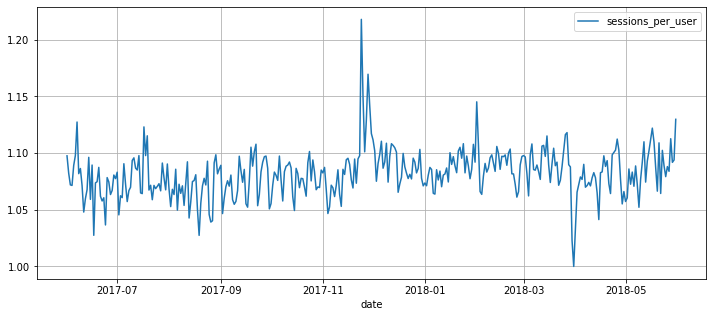

In [55]:
sessions_per_user_per_day.plot(y = 'sessions_per_user',  figsize=(12, 5), grid = True)
plt.show()

Менее всего пользователи были активны в конце марта 2018 года, а более - в конце ноября 2017 года. Возможно, это связано с сезонностью.

In [56]:
print("Количество сессий, приходящихся на одного пользователя в день: {0:.2f}".format(sessions_per_user_per_day['sessions_per_user'].mean()))

Количество сессий, приходящихся на одного пользователя в день: 1.08


####  Продолжительность типичной пользовательской сессии за весь период

In [57]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [58]:
print("Средняя продолжительность сессии в секундах (ASL): {0:.0f} секунд".format(visits['session_duration_sec'].mean()))

Средняя продолжительность сессии в секундах (ASL): 644 секунд


Но для того, чтобы понять, насколько среднее достоверно отражает реальность, нужно взлянуть на распределение значений:

In [59]:
# посмотрим на описательные статистики
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

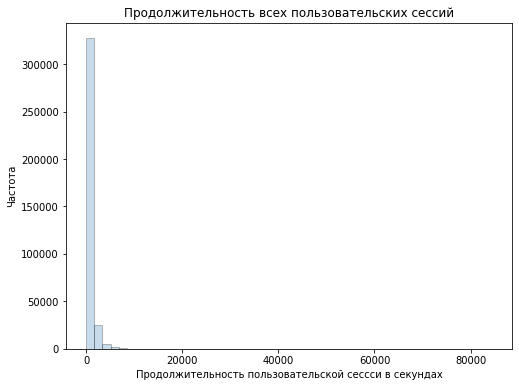

In [60]:
# посмотрим на распределение
plt.figure(figsize =(8, 6))

hist = visits['session_duration_sec'].plot(kind = 'hist', bins = 50, grid=True,  alpha=0.25, ec='black')
plt.title('Продолжительность всех пользовательских сессий')  # Заголовок
plt.xlabel('Продолжительность пользовательской сессси в секундах')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

Большинство значений сосредоточено в районе нуля. Распределение вовсе не похоже на нормальное, поэтому смотреть на среднее или медиану не стоит. В качестве подходящей меры - выберем моду:

In [61]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


**Вывод:**

Таким образом, мы получили, что продолжительность типичной пользовательской сессии за весь период составляет 60 секунд (или 1 минуту)

#### Расчет Retention Rate

In [62]:
# Определим дату первой активности
first_activity = visits.groupby(['uid'])['start_ts'].min()
first_activity.name = 'first_activity_date'
visits = visits.join(first_activity, on='uid') 

In [63]:
first_activity

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_activity_date, Length: 228169, dtype: datetime64[ns]

In [64]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,day_of_week,mau,wau,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,2017-07-01,2017-06-29,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2017-12-01,2017-12-21,0,2017-12-27 14:06:00


In [65]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

In [66]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,day_of_week,mau,wau,session_duration_sec,first_activity_date,first_activity_month,activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


In [67]:
# Для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»:

In [68]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [69]:
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Найдём исходное количество пользователей в когорте:

In [70]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [71]:
initial_users_count.head()

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [72]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [73]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month') 

Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте:

In [74]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [75]:
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [76]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')

Построим сводную таблицу и создадим тепловую карту:

In [77]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

In [78]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Исключим нулевой месяц для наглядноси heatmap
retention_pivot = retention_pivot.drop(columns =0)

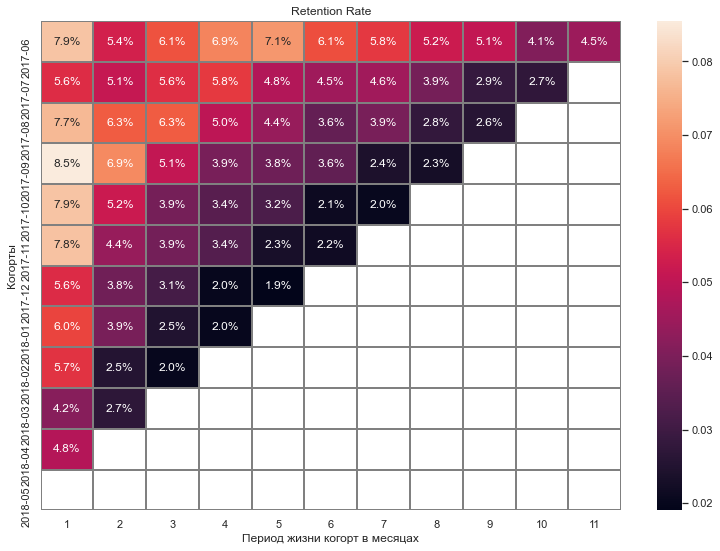

In [80]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate')
plt.xlabel('Период жизни когорт в месяцах')
plt.ylabel('Когорты')
plt.show(); 

Также посмотрим на количество пользователей в каждой когорте:

In [81]:
number_of_clients_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='cohort_users',
) 

In [82]:
number_of_clients_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0,13259.0
2017-07,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,13140.0,NaN
2017-08,10181.0,10181.0,10181.0,10181.0,10181.0,10181.0,10181.0,10181.0,10181.0,10181.0,NaN,NaN
2017-09,16704.0,16704.0,16704.0,16704.0,16704.0,16704.0,16704.0,16704.0,16704.0,NaN,NaN,NaN
2017-10,25977.0,25977.0,25977.0,25977.0,25977.0,25977.0,25977.0,25977.0,NaN,NaN,NaN,NaN
2017-11,27248.0,27248.0,27248.0,27248.0,27248.0,27248.0,27248.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,25268.0,25268.0,25268.0,25268.0,25268.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,22624.0,22624.0,22624.0,22624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,22197.0,22197.0,22197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


И найдем средний Retention Rate на второй месяц «жизни» когорт:

In [83]:
print("Средний Retention Rate на второй месяц «жизни» когорт: {0:.2%}".format(retention_pivot[1].mean()))

Средний Retention Rate на второй месяц «жизни» когорт: 6.52%


**Выводы по данному пункту:**

- Преимущественно, возвращаются только 5-10% потенциальных пользователей, коэффициент удержания очень низкий. Это можно объяснить тем, что на протяжении года не всегда есть время и постоянное желание посещать культурные мероприятия.


- У первой когорты, Retention Rate выше, чем у всех остальных когорт, эта группа нам наиболее интересна


- С октября 2017 года средняя численность когорты серьезно возросла (с 16704 до 25977 человек). Этот скачок можно объяснить сезонностью - как мы уже выяснили, в летнее время спрос на различные билеты наиболее низкий. Но, возможно, и маркетологи выбрали наиболее выигрышную стратегию продвижения.


- Также из-за сезонности в марте и апреле 2018, Retention rate существенно снизился


- Средний Retention Rate на второй месяц «жизни» когорт составил 6.52%


### Расчет метрик электронной коммерции

1) Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

2) Применяя когортный анализ или другой метод, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

3) Рассчитать средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

4) Выяснить, как меняется LTV на покупателя по когортам. Учитывать, что LTV — накопительная метрика. Рассчитать  средний LTV по когортам за 6 месяцев; в расчёт включить когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

#### Расчет среднего времени, прошедшего  с момента посещения сайти до совершения покупки

Чтобы узнать, сколько времени клиентам потребуется на приятие решения о покупке, нужно объединить таблицы с информацией о визитах (visits) и таблицы с информацией о заказах (orders):

In [84]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [85]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,day_of_week,mau,wau,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [86]:
# Сгруппируем датафрейм orders по пользователям, чтобы найти дату их первого заказа
first_purchase = orders.groupby('uid')[['buy_ts']].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date']

In [87]:
first_purchase

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [88]:
# Сгруппируем датафрейм visits по пользователя, чтобы найти дату первого визита:
first_visit = visits.groupby('uid')[['start_ts']].min().reset_index()
first_visit.columns = ['uid', 'first_visit_date']

In [89]:
first_visit

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


Объединим таблицы:

In [90]:
time_of_purchase = first_purchase.merge(first_visit, on='uid')

In [91]:
time_of_purchase.head()

,uid,first_purchase_date,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [92]:
# проверка на наличие дубликатов
time_of_purchase.duplicated().sum()

0

In [93]:
time_of_purchase['duration_of_decision_making'] = time_of_purchase['first_purchase_date'] - time_of_purchase['first_visit_date']
time_of_purchase['duration_of_decision_making'] = time_of_purchase['duration_of_decision_making']/np.timedelta64(1, 'm')
time_of_purchase['duration_of_decision_making'] = time_of_purchase['duration_of_decision_making'].round()

In [94]:
time_of_purchase.head()

,uid,first_purchase_date,first_visit_date,duration_of_decision_making
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Сгруппируем датафрейм по "uid" (по пользователям) и найдем минимальную разницу по времени  разницу между первым визитом на сайт и первой покупкой:

In [95]:
min_duration_of_decision_making = time_of_purchase.groupby('uid')['duration_of_decision_making'].min()

In [96]:
min_duration_of_decision_making

uid
313578113262317         154022.0
1575281904278712             0.0
2429014661409475            79.0
2464366381792757          1184.0
2551852515556206             0.0
                          ...   
18445147675727495770    137973.0
18445407535914413204         7.0
18445601152732270159    333303.0
18446156210226471712    148893.0
18446167067214817906        11.0
Name: duration_of_decision_making, Length: 36523, dtype: float64

Оценим выбросы:

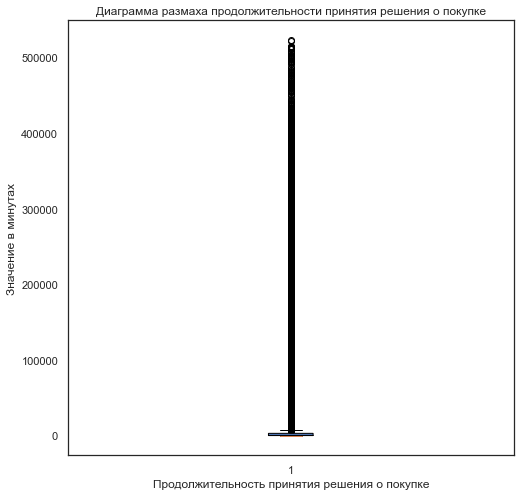

In [97]:
# Построим диаграмму размаха продолжительности принятия решения о покупке
plt.figure(figsize =(8, 8))
plt.boxplot(min_duration_of_decision_making,  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмма размаха продолжительности принятия решения о покупке')
plt.xlabel('Продолжительность принятия решения о покупке')
plt.ylabel('Значение в минутах')
plt.show()

Видим, что выбросов колоссальное количество, сделаем срез в данных, чтобы отследить, с какого момента начинаются выбросы:

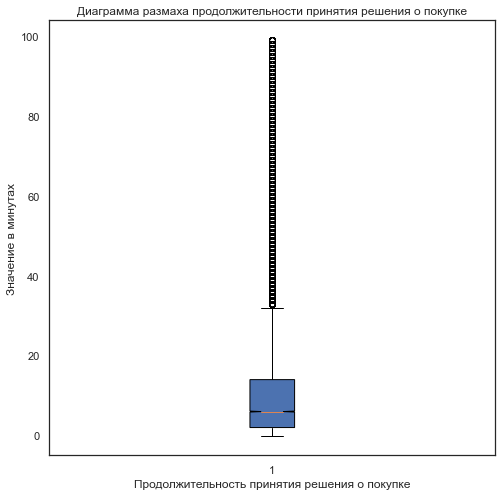

In [98]:
# Построим диаграмму размаха продолжительности принятия решения о покупке
plt.figure(figsize =(8, 8))
plt.boxplot(min_duration_of_decision_making[min_duration_of_decision_making < 100],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмма размаха продолжительности принятия решения о покупке')
plt.xlabel('Продолжительность принятия решения о покупке')
plt.ylabel('Значение в минутах')
plt.show()

Видим, что выбросами считается разница во времени от 30 и более минут. Построим по очищенным от выбросов данных гистограмму распределения времени принятия решения о покупке:

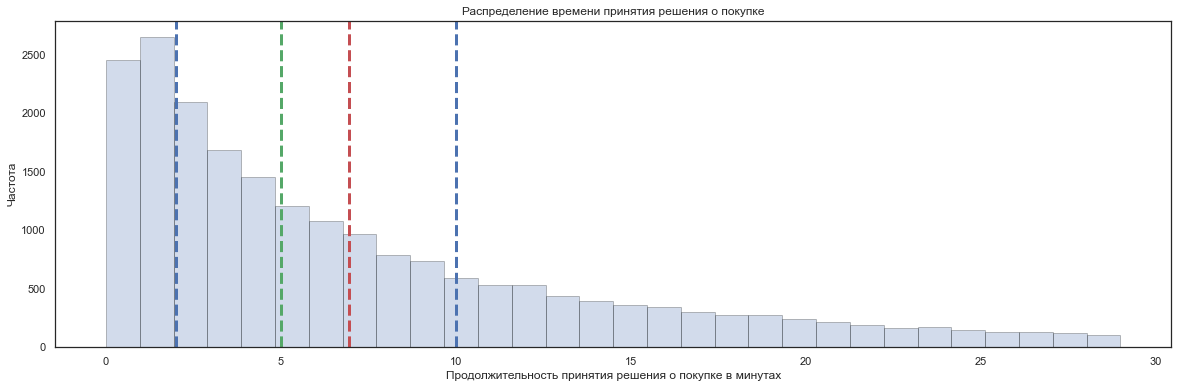

In [99]:
plt.figure(figsize =(20, 6))

hist1 = min_duration_of_decision_making[min_duration_of_decision_making < 30].plot(kind = 'hist', bins = 30, grid=True,  alpha=0.25, ec='black')
plt.axvline(x= min_duration_of_decision_making[min_duration_of_decision_making < 30].median(),   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= min_duration_of_decision_making[min_duration_of_decision_making < 30].mean(),   # линия медианы
                linewidth=3,   # толщина линии
                color='r',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= min_duration_of_decision_making[min_duration_of_decision_making < 30] .quantile(.25),   #  линия 25% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.axvline(x=min_duration_of_decision_making[min_duration_of_decision_making < 30].quantile(.75),  #  линия 75% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.title('Распределение времени принятия решения о покупке')  # Заголовок
plt.xlabel('Продолжительность принятия решения о покупке в минутах')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

Видим, что у большинства пользователей на оформление заказа уходит от 1 до двух минут. Это означает, что превалирует категория пользователей, которые целенаправленно заходят на сайт и точно знают, что они собираются там покупать. Медианное значение на очищенных данных равно 5 минутам.  А среднее - 7 минутам. Посмотрим на описательные статистики по всем данным, но лучше ориентироваться на эти, так как выбросы могут серьезно влиять на данные показатели:

In [100]:
min_duration_of_decision_making.describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: duration_of_decision_making, dtype: float64

In [101]:
min_duration_of_decision_making.mode()

0    1.0
dtype: float64

Здесь же медианное значение существенно выше и составляет 16 минут, а  среднее слишком неправдоподобно (24340 минут). Модальное значение, равное 1 минуте наиболее похоже на правду, и совпадает со статистиками на ощищенных от выбросов данных. **Вывод** - посетители Яндекс.Афиши достаточно решительны в своих действиях)

#### Расчет среднего количества покупок на одного покупателя за определённый период

Для расчета среднего количества покупок на одного покупателя мы будем применять когорный анализ (по аналогии с расчетом Retention Rate)

In [102]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [103]:
#определим дату первой покупки
first_purchase_date = orders.groupby(['uid'])['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'
purchase_frequency = orders.join(first_purchase_date,on='uid') 

In [104]:
purchase_frequency.head()

,buy_ts,revenue,uid,first_purchase_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [105]:
purchase_frequency['first_purchase_month'] = purchase_frequency['first_purchase_date'].astype('datetime64[M]')
purchase_frequency['purchase_month'] = purchase_frequency['buy_ts'].astype('datetime64[M]')

In [106]:
purchase_frequency.head()

,buy_ts,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [107]:
purchase_frequency['difference_in_purchase_dates'] = purchase_frequency['purchase_month'] - purchase_frequency['first_purchase_month']
purchase_frequency['difference_in_purchase_dates'] = purchase_frequency['difference_in_purchase_dates']/ np.timedelta64(1, 'M')
purchase_frequency['difference_in_purchase_dates'] = purchase_frequency['difference_in_purchase_dates'].round().astype('int') 

In [108]:
purchase_frequency

,buy_ts,revenue,uid,first_purchase_date,first_purchase_month,purchase_month,difference_in_purchase_dates
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0


In [109]:
purchases_grouped_by_cohorts = purchase_frequency.groupby(['first_purchase_month','difference_in_purchase_dates']).agg({'buy_ts': 'count', 'uid': 'nunique'})

In [110]:
purchases_grouped_by_cohorts['purchases_per_client'] = purchases_grouped_by_cohorts['buy_ts']/purchases_grouped_by_cohorts['uid']

In [111]:
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()

In [112]:
purchases_grouped_by_cohorts.head()

,first_purchase_month,difference_in_purchase_dates,buy_ts,uid,purchases_per_client
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182


In [113]:
# сгруппируем данные
purchase_pivot = purchases_grouped_by_cohorts.pivot_table(index='first_purchase_month', 
                                                          columns='difference_in_purchase_dates', 
                                                          values='purchases_per_client')

In [114]:
purchase_pivot

difference_in_purchase_dates,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


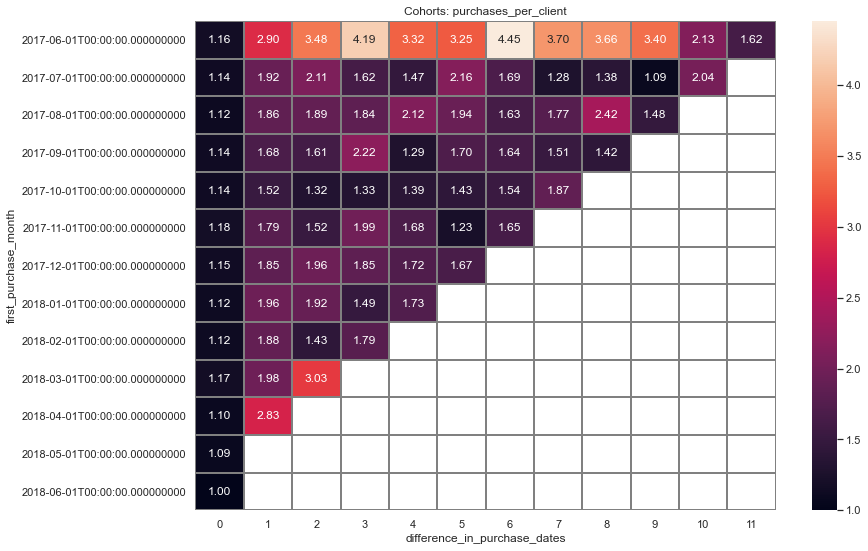

In [115]:
# построим heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: purchases_per_client')
sns.heatmap(purchase_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');


In [116]:
print("Cреднее количество покупок на одного покупателя по всем когортам на 6-ой месяц их жизни: {0:.2f}".format(purchase_pivot[5].mean()))

Cреднее количество покупок на одного покупателя по всем когортам на 6-ой месяц их жизни: 1.91


**Вывод:**
 
- Cреднее количество покупок на одного покупателя по всем когортам за 6-ой месяц их жизни: 1.91 (почти 2 заказа в месяц)


- Лидирующая по данному показателю когорта - опять первая. Число заказов в некоторые месяцы у этой когорты иногда составляет 3 или четыре заказа. Другие когорты, в среднем, делают от 1 до 2 заказов.


- Также интересны мартовская и апрельская когорта (2018 год) на третий и второй месяц их "жизни", соответственно. В этот временной период клиенты делают по 3 покупки в месяц. Сложно сказать, с чем может быть связан этот рост, поскольку покупки выросли в мае, а как мы уже исследовали ранее, ближе к лету происходит падение спроса на услуги сайта

    


In [117]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [118]:
orders_for_six_month = orders.query('order_month < 2017.12')
orders_for_six_month

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
21244,2017-11-30 23:25:00,4.28,3245936042492862529,2017-11-01
21245,2017-11-30 23:28:00,3.05,12564192341382266006,2017-11-01
21246,2017-11-30 23:29:00,7.94,15037291077750437377,2017-11-01
21247,2017-11-30 23:32:00,1.22,10686394363350127218,2017-11-01


In [119]:
print('Cреднее количество покупок на одного покупателя за 6 месяцев: {0:.2f}'.format(orders_for_six_month.shape[0]/orders_for_six_month['uid'].nunique()))


Cреднее количество покупок на одного покупателя за 6 месяцев: 1.30


#### Расчет среднего чека

In [120]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [121]:
orders['revenue'].mode()

0    1.83
dtype: float64

In [122]:
orders['month'] = orders['buy_ts'].dt.month_name()

In [123]:
orders.head()

,buy_ts,revenue,uid,order_month,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,June
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,June
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,June
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,June
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,June


In [124]:
# рассчитаем размер среднего чека по месяцам
mean_purchase_by_month = orders.groupby('month').agg({'revenue': 'mean'})

In [125]:
mean_purchase_by_month['revenue'].sort_values().round(2)

month
June         4.06
January      4.11
May          4.77
November     4.78
February     4.84
August       4.85
October      4.93
April        5.15
July         5.31
March        5.41
September    5.42
December     5.85
Name: revenue, dtype: float64

Видим, что размер среднего чека варьируется от 4.06 ед. до 5.86 ед.

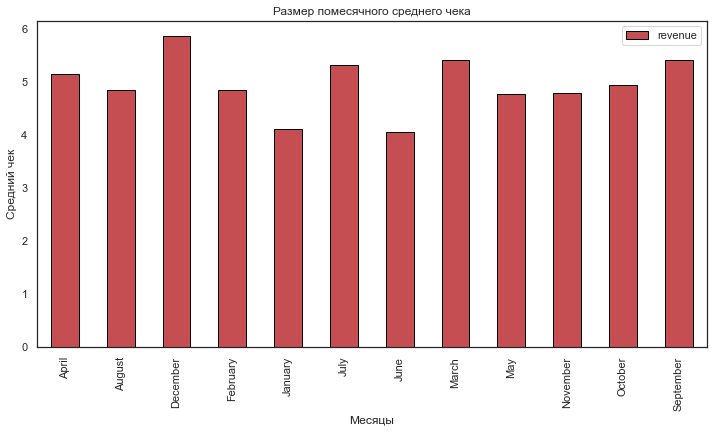

In [126]:
# Для наглядности построим столбчатую диаграмму
mean_purchase_by_month.plot(kind='bar', figsize=(12, 6), ec='black', color='r')

plt.title('Размер помесячного среднего чека')
plt.xlabel('Месяцы')
plt.ylabel('Средний чек')
plt.show()

 **Вывод**: Наименьший размер среднего чека приходится на летний месяц июнь, а наибольший на декабрь. Это опять же объясняется сезонностью, однако данный показатель по июлю достаточно высокий, что интересно было бы исследовать.

#### Изменение LTV на покупателя по когортам

**Условие:**
    
Выяснить, как меняется LTV на покупателя по когортам. Учитывать, что LTV — накопительная метрика. Рассчитать средний LTV по когортам за 6 месяцев; в расчёт включить когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

In [127]:
orders.head()

,buy_ts,revenue,uid,order_month,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,June
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,June
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,June
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,June
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,June


In [128]:
#Уберем столбец, который был нам полезен для расчетов в предыдущем пункте
orders.drop('month', axis=1, inplace=True)

In [129]:
#проверка
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [130]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Выделим месяцы из дат в таблицах с заказами и расходами:

In [131]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 

Получим месяц первой покупки каждого покупателя:

In [132]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [133]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head()) 

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [134]:
orders_new = pd.merge(orders,first_orders, on='uid')
print(orders_new.head())

               buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01  


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [135]:
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
print(cohorts.head()) 

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [136]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head())

  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


Поскольку LTV считают не из выручки, а из валовой прибыли, то нужно найти валовую прибыль, умножив выручку на маржинальность. Также, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [137]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


Найдём LTV:

In [138]:
report['ltv'] = report['gp'] / report['n_buyers']
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


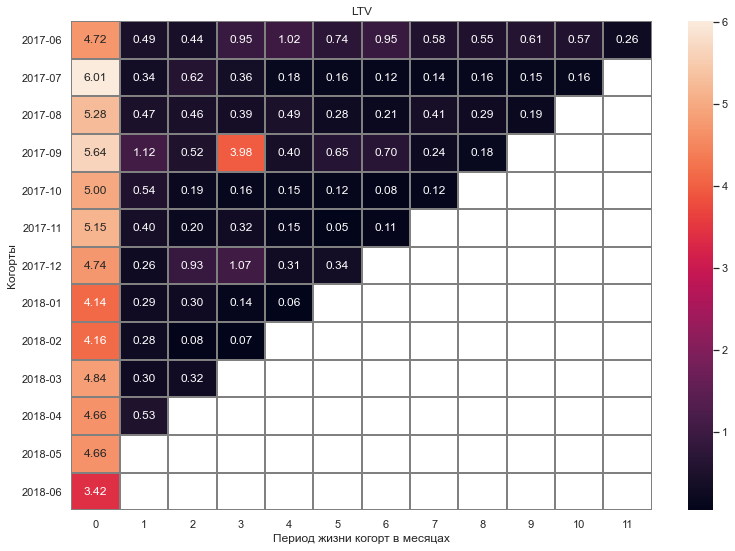

In [139]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 
plt.title('LTV')
plt.xlabel('Период жизни когорт в месяцах')
plt.ylabel('Когорты')
plt.show()



In [140]:
#Посмотрим на накопленный LTV
accumulated_ltv = output.cumsum(axis=1)

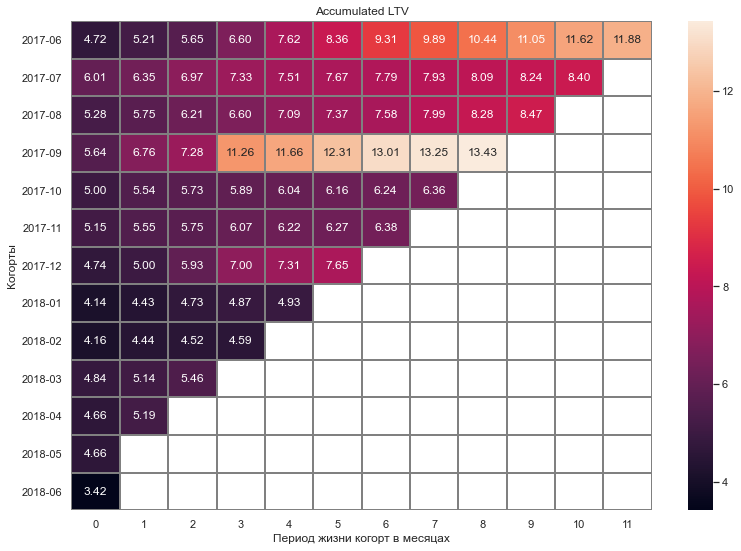

In [141]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(accumulated_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Accumulated LTV')
plt.xlabel('Период жизни когорт в месяцах')
plt.ylabel('Когорты')
plt.show()


Для того, чтобы посчитать средний LTV по когортам за 6 месяцев - необходимо построить таблицу с усреднением LTV всех когорт за каждый месяц их жизни. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0):

In [142]:
output.cumsum(axis=1).mean(axis=0) 

age
0      4.801538
1      5.396364
2      5.823000
3      6.690000
4      7.297500
5      7.970000
6      8.385000
7      9.084000
8     10.060000
9      9.253333
10    10.010000
11    11.880000
dtype: float64

**Вывод:**

- Можно отметить, что наиболее "старые" когорты (2017 года) приносили больше прибыли, чем последующие - их накопительный LTV заметно выше, чем по остальным когортам.


- Также, что лидерство опять остается за первой когортой - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. Возможно, это связано с тем, что именно эта когорта показывает лучший показатель Retention Rate.


- Некоторая аномалия есть в сентябрьской когорте 2017 года - начиная с четвертого месяца ее жизни накопленный LTV существенно возрастает. Необходимо понять причину этого явления


- Средний LTV по когортам за 6 месяцев составляет 7.97 ед.




### Расчет маркетинговых метрик

1) Посчитать общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализировать изменения метрик во времени;

2) Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразить изменения метрик на графиках;

3) Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт. Обратить внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построить графики, отражающие изменения метрик во времени.

#### Расчет общей суммы расходов на маркетинг, распределение затрат по источникам, визуализация изменения метрик во времени

In [143]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


**Общая сумма расходов на маркетинг составляет:**

In [144]:
print('Сумма расходов на маркетинг:',costs['costs'].sum(), 'ед.')

Сумма расходов на маркетинг: 329131.62 ед.


**Распределение затрат по источникам:**

In [145]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [146]:
costs_by_source['share_of_expenditure'] = costs_by_source['costs']/costs['costs'].sum()*100

In [147]:
costs_by_source

,source_id,costs,share_of_expenditure
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


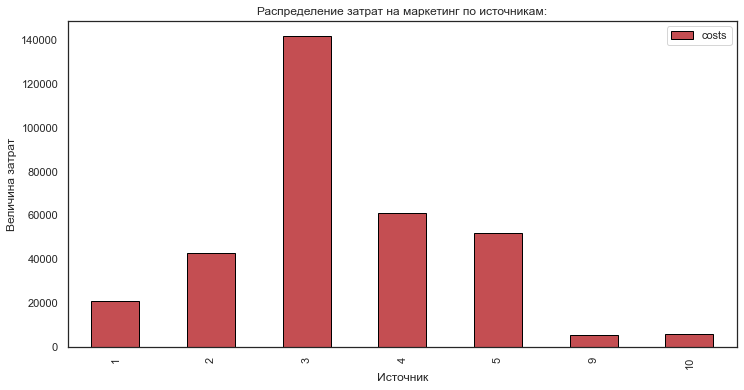

In [148]:
# Для наглядности построим столбчатую диаграмму
costs_by_source.plot(x ='source_id', y='costs', kind='bar', figsize=(12, 6), ec='black', color='r')

plt.title('Распределение затрат на маркетинг по источникам:')
plt.xlabel('Источник')
plt.ylabel('Величина затрат')
plt.show()

Самый дорогостоящий источник №3, он существенно выделяется на фоне остальных. А наиболее бюджетными альтернативами оказались источники №9 и №10.

**Затраты на маркетинг по месяцам:**

In [149]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs_per_month = costs.groupby('costs_month').agg({'costs':'sum'}).reset_index()
costs_per_month

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


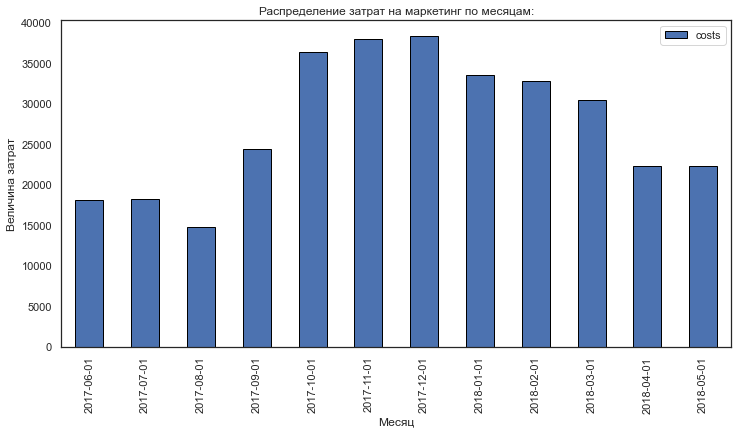

In [150]:
# Для наглядности построим столбчатую диаграмму
costs_per_month.plot(x ='costs_month', y='costs', kind='bar', figsize=(12, 6), ec='black', color='b')

plt.title('Распределение затрат на маркетинг по месяцам:')
plt.xlabel('Месяц')
plt.ylabel('Величина затрат')
plt.show()

**Вывод:**

Больше всего трат на маркетинг пришлось на октябрь, ноябрь и декабрь 2017 года, а меньше всего - на август 2017. Получается, что причина низкой активности пользователей в летние месяцы может быть связана не только с сезонностью, но и с качеством маркетинговых кампаний. Но с другой стороны, траты на маркетинг могут окупаться и более длительное время.

#### Расчет среднего CAC на одного покупателя для всего проекта и для каждого источника трафика

In [151]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,day_of_week,mau,wau,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [152]:
#найдем первый рекламный источник, из которого пришел каждый пользователь
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
time_of_purchase=pd.merge(time_of_purchase,users,left_on = 'uid', right_index = True)
time_of_purchase['first_purchase_date'] = time_of_purchase['first_purchase_date'].dt.date
time_of_purchase.head()

,uid,first_purchase_date,first_visit_date,duration_of_decision_making,source_id
0,313578113262317,2018-01-03,2017-09-18 22:49:00,154022.0,2
1,1575281904278712,2017-06-03,2017-06-03 10:13:00,0.0,10
2,2429014661409475,2017-10-11,2017-10-11 17:14:00,79.0,3
3,2464366381792757,2018-01-28,2018-01-27 20:10:00,1184.0,5
4,2551852515556206,2017-11-24,2017-11-24 10:14:00,0.0,5


In [153]:
# Посчитаем количество уникальных пользователей по дням и источникам
buyers_daily = time_of_purchase.groupby(['source_id','first_purchase_date']).agg({'uid':'count'}).reset_index()
buyers_daily.rename(columns = {'uid':'n_buyers'}, inplace = True)
buyers_daily['first_purchase_date'] = pd.to_datetime(buyers_daily['first_purchase_date'] )
buyers_daily.head(5)


,source_id,first_purchase_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [154]:
costs.head()

,source_id,dt,costs,month,costs_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [155]:
# рассчитаем расходы на одного пользователя
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs_= pd.merge(buyers_daily, costs, left_on = ['source_id', 'first_purchase_date'],right_on =['source_id','dt'])
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']
costs_.head()

,source_id,first_purchase_date,n_buyers,dt,costs,month,costs_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,2017-06-01,3.171111


Теперь мы можем посчитать **средний CAC на одного покупателя для всего проекта:**

In [156]:
print('средний CAC на одного покупателя для всего проекта: {0:.2f} y.e'.format(costs_['costs_per_buyer'].mean()))

средний CAC на одного покупателя для всего проекта: 10.19 y.e


А теперь посчитаем **средний CAC на одного покупателя для каждого источника трафика:**

In [157]:
# средние расходы на одного пользователя по всем источникам
costs_.groupby('source_id')['costs_per_buyer'].mean()

source_id
1      9.489732
2     16.287024
3     15.580474
4      7.271743
5      8.336731
9      6.842532
10     6.555415
Name: costs_per_buyer, dtype: float64

Видим, что наиболее дорогостоящие источники в расчете на одного покупателя - источник №2 и №3

 Отразим изменения метрик на графиках:

In [158]:
costs_.pivot_table(index =['costs_month'], columns ='source_id',values = 'costs_per_buyer', aggfunc ='mean')

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


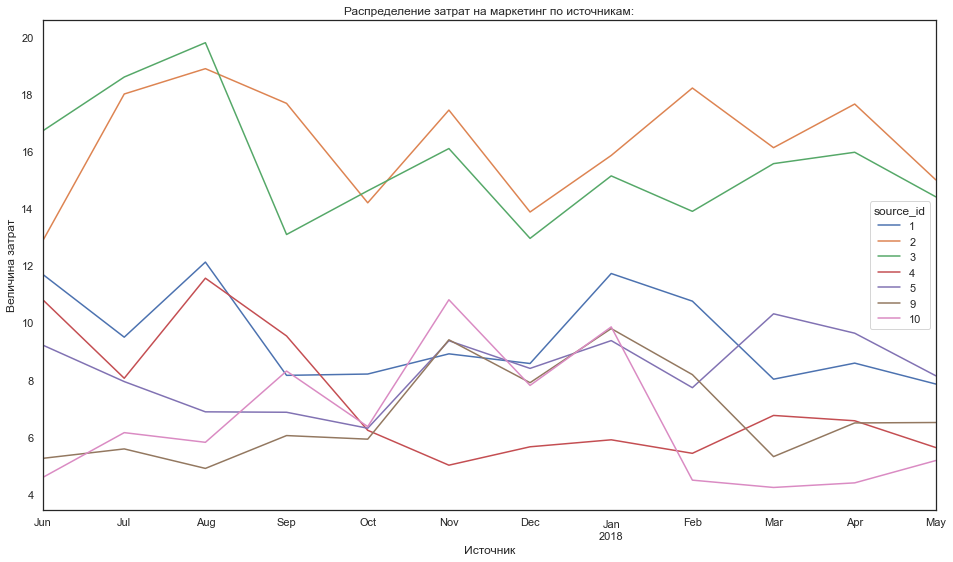

In [159]:
costs_.pivot_table(index =['costs_month'], columns ='source_id',values = 'costs_per_buyer', aggfunc ='mean').plot(figsize = (16,9))
plt.title('Распределение затрат на маркетинг по источникам:')
plt.xlabel('Источник')
plt.ylabel('Величина затрат')

plt.show()

**Вывод:**
    
- Средний CAC на одного покупателя для всего проекта: 10.19 y.e

    
- Наиболее дорогостоящие источники в расчете на одного покупателя - источник №2 и №3

#### ROMI по когортам в разрезе источников

In [160]:
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [161]:
first_activity.reset_index()
first_activity.columns =['uid','first_activity_date']

In [162]:
orders = orders.join(first_activity, on='uid')

In [163]:
orders

,buy_ts,revenue,uid,order_month,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2017-10-23 12:32:00


In [164]:
#вычислим жизненный период пользователей в когорте
orders['lifetime'] = ((orders['buy_ts'] - orders['first_activity_date'])/np.timedelta64(1,'M')).round().astype('int')

In [165]:
orders['buy_ts'] = orders['buy_ts'].dt.strftime('%Y-%m')
orders['first_activity_date'] = orders['first_activity_date'].dt.strftime('%Y-%m')

In [166]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   buy_ts               50415 non-null  object        
 1   revenue              50415 non-null  float64       
 2   uid                  50415 non-null  uint64        
 3   order_month          50415 non-null  datetime64[ns]
 4   first_activity_date  50415 non-null  object        
 5   lifetime             50415 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2), uint64(1)
memory usage: 1.7+ MB


In [167]:
# определим, какой источник является первым для каждого пользователя
# отсортируем таблицу по пользователю и его первому визиту и оставим только  самый первый из источников
users_source = visits.sort_values(by = ['uid','start_ts']).groupby('uid').agg({'source_id':'first'}).reset_index()

In [168]:
orders = orders.merge(users_source, on ='uid')

In [169]:
orders

,buy_ts,revenue,uid,order_month,first_activity_date,lifetime,source_id
0,2017-06,17.00,10329302124590727494,2017-06-01,2017-06,0,1
1,2017-06,0.55,11627257723692907447,2017-06-01,2017-06,0,2
2,2017-06,0.37,17903680561304213844,2017-06-01,2017-06,0,2
3,2017-06,0.55,16109239769442553005,2017-06-01,2017-06,0,2
4,2017-06,0.37,14200605875248379450,2017-06-01,2017-06,0,3
...,...,...,...,...,...,...,...
50410,2018-05,4.64,12296626599487328624,2018-05-01,2018-05,0,4
50411,2018-05,5.80,11369640365507475976,2018-05-01,2018-05,0,10
50412,2018-05,0.30,1786462140797698849,2018-05-01,2018-05,0,3
50413,2018-05,3.67,3993697860786194247,2018-05-01,2017-10,7,3


In [170]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   buy_ts               50415 non-null  object        
 1   revenue              50415 non-null  float64       
 2   uid                  50415 non-null  uint64        
 3   order_month          50415 non-null  datetime64[ns]
 4   first_activity_date  50415 non-null  object        
 5   lifetime             50415 non-null  int32         
 6   source_id            50415 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2), uint64(1), uint8(1)
memory usage: 2.2+ MB


In [171]:
orders_cohort_sizes = (
    orders.groupby('first_activity_date')
    .agg({'uid': 'nunique'})
    .reset_index()
)
orders_cohort_sizes.columns = ['first_activity_date','n_buyers']
print(orders_cohort_sizes.head()) 

  first_activity_date  n_buyers
0             2017-06      2923
1             2017-07      2458
2             2017-08      1721
3             2017-09      3058
4             2017-10      4678


In [172]:
#необходимые данные по заказам
romi_sources = orders.groupby(['first_activity_date','lifetime','source_id']).agg({'revenue':'sum'}).reset_index()

In [173]:
#присоединим таблицу с информацией о количестве покупателей в первый месяц
romi_sources = romi_sources.merge(orders_cohort_sizes, on ='first_activity_date')

In [174]:
romi_sources

,first_activity_date,lifetime,source_id,revenue,n_buyers
0,2017-06,0,1,1258.65,2923
1,2017-06,0,2,967.78,2923
2,2017-06,0,3,2826.65,2923
3,2017-06,0,4,1906.74,2923
4,2017-06,0,5,2036.51,2923
...,...,...,...,...,...
606,2018-05,1,2,9.77,2316
607,2018-05,1,3,17.08,2316
608,2018-05,1,4,14.35,2316
609,2018-05,1,5,33.66,2316


In [175]:
#посчитаем ltv, учитывая, что маржинальность у нас 100%
romi_sources['ltv'] = romi_sources['revenue']/romi_sources['n_buyers']

In [176]:
romi_sources

,first_activity_date,lifetime,source_id,revenue,n_buyers,ltv
0,2017-06,0,1,1258.65,2923,0.430602
1,2017-06,0,2,967.78,2923,0.331091
2,2017-06,0,3,2826.65,2923,0.967037
3,2017-06,0,4,1906.74,2923,0.652323
4,2017-06,0,5,2036.51,2923,0.696719
...,...,...,...,...,...,...
606,2018-05,1,2,9.77,2316,0.004218
607,2018-05,1,3,17.08,2316,0.007375
608,2018-05,1,4,14.35,2316,0.006196
609,2018-05,1,5,33.66,2316,0.014534


In [177]:
costs

,source_id,dt,costs,month,costs_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01,2018-05-01


In [178]:
# сгруппируем маркетинговые расходы по месяцам и источникам
costs_source = costs.groupby(['month','source_id']).agg({'costs':'sum'}).reset_index().rename(columns={'month':'first_activity_date'})

In [179]:
costs_source['first_activity_date'] = costs_source['first_activity_date'].dt.strftime('%Y-%m')

Рассчитаем CAC И ROMI:

In [180]:
romi_sources = romi_sources.merge(costs_source, on = ['source_id','first_activity_date'])

In [181]:
romi_sources['cac'] = romi_sources['costs']/romi_sources['n_buyers']

In [182]:
romi_sources['romi'] = romi_sources['ltv']/romi_sources['cac']

In [183]:
romi_sources.head(3)

,first_activity_date,lifetime,source_id,revenue,n_buyers,ltv,costs,cac,romi
0,2017-06,0,1,1258.65,2923,0.430602,1125.61,0.385087,1.118194
1,2017-06,1,1,491.80,2923,0.168252,1125.61,0.385087,0.436919
2,2017-06,2,1,608.55,2923,0.208194,1125.61,0.385087,0.540640


In [184]:
#создадим список сназваниями источнков
id_list = list(romi_sources['source_id'].unique())

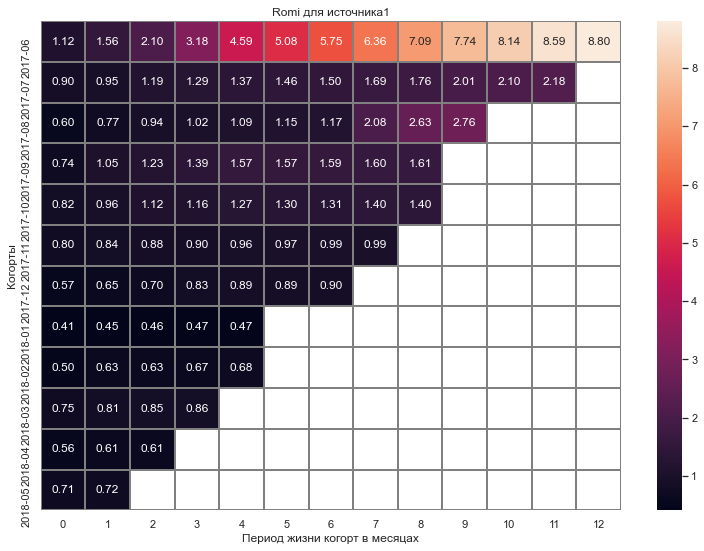

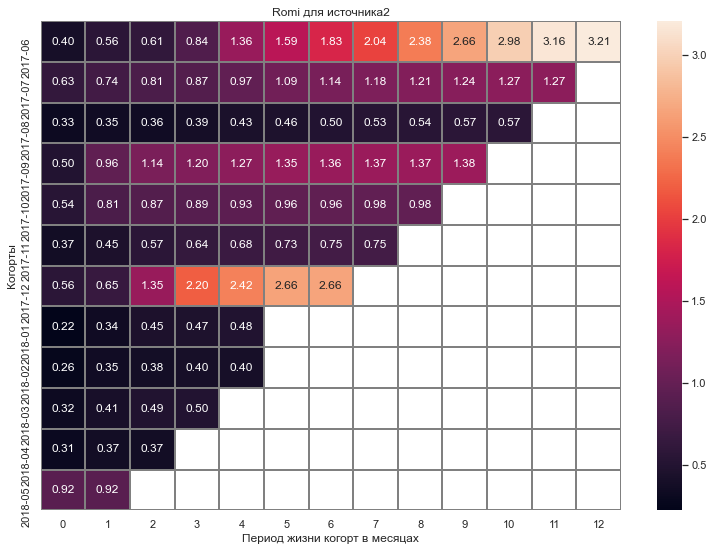

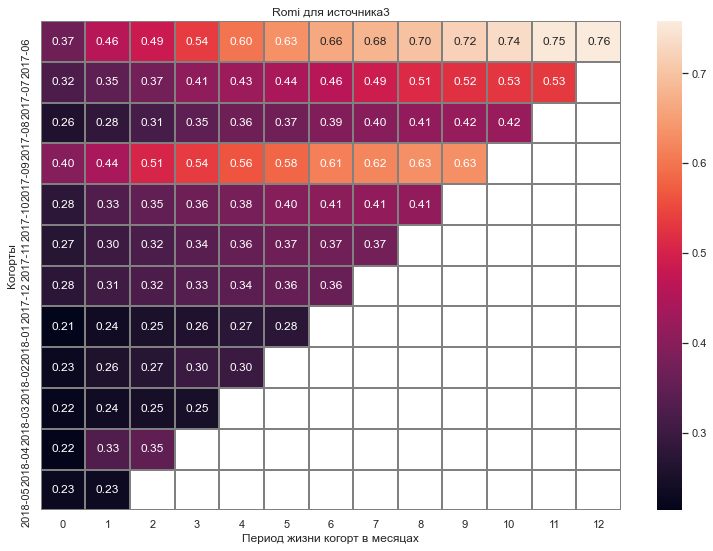

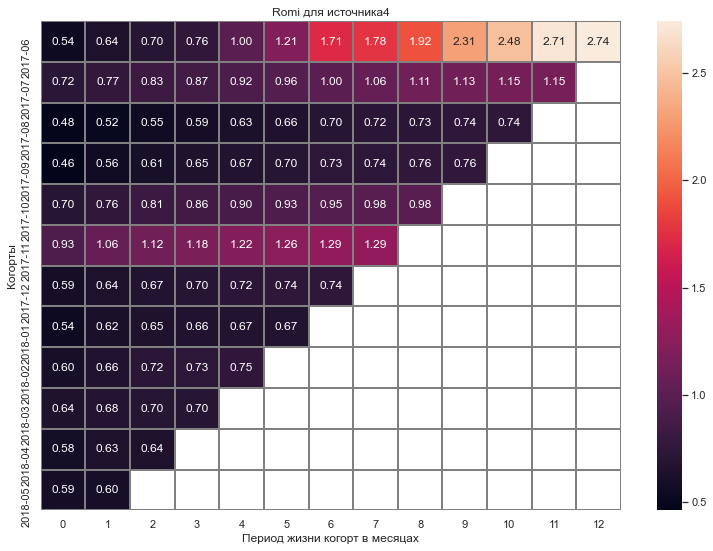

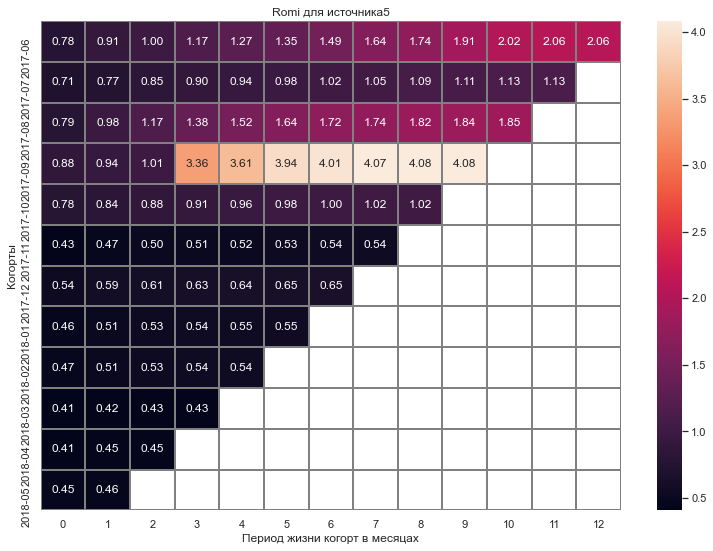

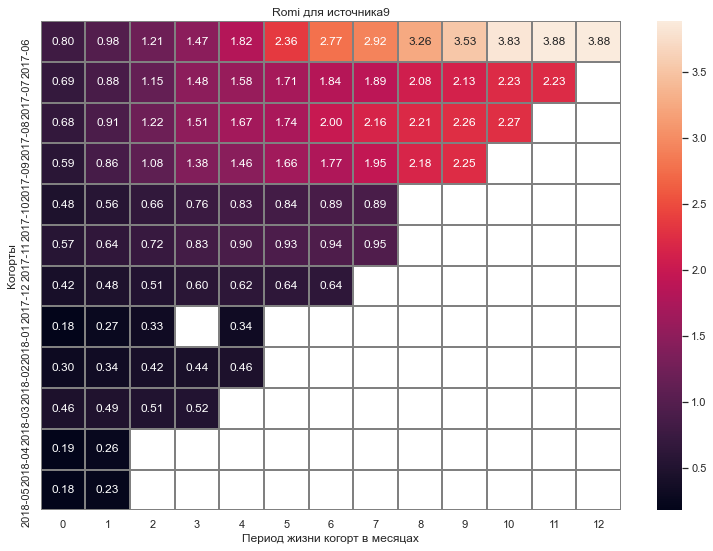

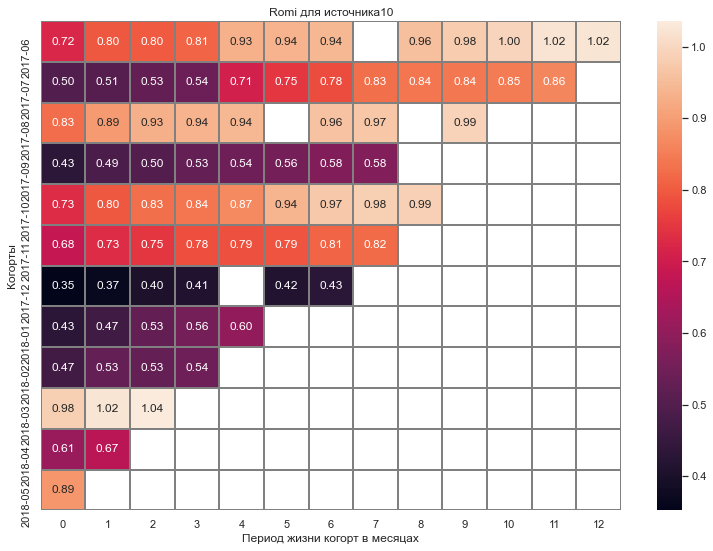

In [185]:
# Напишем цикл, который будет строить heatmap для каждого источника
for id in id_list:
    romi = romi_sources.query('source_id == @id').pivot_table(index = 'first_activity_date', columns ='lifetime', values ='romi', aggfunc = 'mean')
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    sns.heatmap(romi.cumsum(axis = 1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.title('Romi для источника' +str(id))
    plt.xlabel('Период жизни когорт в месяцах')
    plt.ylabel('Когорты')
    
    plt.show()

**Вывод:** 

Таким образом, мы наглядно можем посмотреть на окупаемость когорт в зависимости от источника перехода на сайт. Например первая когорта с источником 1 окупается в мервый же месяц, а та же самая когорта с источником 2 окупается только на пяый месяц своего существования. Подробные выводы будут представлены в следующем смысловом блоке.

### Выводы и рекомендации

#### Продуктовые метрики

1) **Периодичность, с которой пользователи переходят на сайт Яндекс.Афиши:**

- Количество уникальных пользователей в месяц (MAU): 23228 человек

- Количество уникальных пользователей в день (DAU): 908 человек

- Количество уникальных пользователей в неделю (WAU): 5716 человек
            
2) Пик пользовательской активности приходится на ноябрь, а спад пользовательской активности наблюдается во все летние месяцы (в оснобенности, в август). Логично, что сервисы по продаже билетов на развлекательные мероприятия, будут менее востребаваны летом, когда многие уезжают в отпуск.
            
4) Меньше всего пользователей активны в выходные дни. Это может быть обусловлено тем, что люди заранее продумывают свои планы на отдых еще в рабочее время. А в субботу или воскресенье, как раз, посещают развлекательные мероприятия.

5) Количество сессий, приходящихся на одного пользователя в день: 1.08. Вывод - пользователи редко возвращаются на сайт в течение дня, одного визита им более чем достаточно

6) Продолжительность типичной пользовательской сессии за весь период составляет 60 секунд (или 1 минуту)

    * Распределение значений не похоже на нормальное, поэтому смотреть на среднее или медиану не  стоит. В качестве подходящей меры была выбрана мода
    
7) Преимущественно, возвращаются только 5-10% потенциальных пользователей, коэффициент удержания очень низкий. Это можно объяснить тем, что на протяжении года не всегда есть время и постоянное желание посещать культурные мероприятия.

8) У первой когорты (июня 2017 года), Retention Rate выше, чем у всех остальных когорт, эта группа наиболее интересна для последующего анализа

9) В целом, Retention Rate у более молодых когорт существенно ниже, чем у старых

9) С октября 2017 года средняя численность когорты серьезно возросла (с 16704 до 25977 человек). Этот скачок можно объяснить сезонностью - как мы уже выяснили, в летнее время спрос на различные билеты наиболее низкий. Но, возможно, и маркетологи выбрали наиболее выигрышную стратегию продвижения.



#### Метрики электронной коммерции

1) У большинства пользователей на оформление заказа уходит от 1 до двух минут. Это означает, что превалирует категория пользователей, которые целенаправленно заходят на сайт и точно знают, что они собираются там покупать.
  
2) Cреднее количество покупок на одного покупателя по всем когортам за 6-ой месяц их жизни: 1.91 (почти 2 заказа в месяц)

3) Лидирующая по данному показателю когорта - опять первая. Число заказов в некоторые месяцы у этой когорты иногда составляет 3 или четыре заказа. Другие когорты, в среднем, делают от 1 до 2 заказов.

4) Также интересны мартовская и апрельская когорта (2018 год) на третий и второй месяц их "жизни", соответственно. В этот временной период клиенты делают по 3 покупки в месяц. Сложно сказать, с чем может быть связан этот рост, поскольку покупки выросли в мае, а как мы уже исследовали ранее, ближе к лету происходит падение спроса на услуги сайта. Данную группу клиентов следует изучить более подробно

5) Размер среднего чека варьируется от 4.06 ед. до 5.86 ед.

6) Наименьший размер среднего чека приходится на летний месяц июнь, а наибольший на декабрь. Это опять же объясняется сезонностью, однако данный показатель по июлю достаточно высокий, что интересно было бы исследовать.

7) Можно отметить, что наиболее "старые" когорты (2017 года) приносили больше прибыли, чем последующие - их накопительный LTV заметно выше, чем по остальным когортам.

8) Также, что лидерство опять остается за первой когортой - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. Возможно, это связано с тем, что именно эта когорта показывает лучший показатель Retention Rate.

9)Некоторая аномалия есть в сентябрьской когорте 2017 года - начиная с четвертого месяца ее жизни накопленный LTV существенно возрастает. Необходимо понять причину этого явления
Средний LTV по когортам за 6 месяцев составляет 7.97 ед.


#### Маркетинговые метрики

1) Общая сумма затрат на маркетинг за год составляет 329131.62 у.е.

2)  Доля расходов на  каждый источник:
 
   - 43% бюджета расходуется на рекламный источник №3
   
   - от 13 - 18% приходится на каналы 2, 4 и 5
   
   - затраты на остальные источники в сумме составляют менее 10 %
   
3) Больше всего трат на маркетинг пришлось на октябрь, ноябрь и декабрь 2017 года, а меньше всего - на август 2017. Получается, что причина низкой активности пользователей в летние месяцы может быть связана не только с сезонностью, но и с качеством маркетинговых кампаний. Но с другой стороны, траты на маркетинг могут окупаться и более длительное время.
   
4) Средний CAC на одного покупателя для всего проекта: 10.19 y.e

5) Стоимость привлечения одного покупателя значительно отличается для разных источников. Наиболее дорогостоящие источники в расчете на одного покупателя - источник №2 и №3, а наименее - №9 и №10

6) Большинство источников не окупаются, рассмотрим ROMI по когортам в разрезе источников в следующем разделе:




#### Определение источника трафика, на которые маркетологам стоит делать упор

Чтобы понять, на какие источники трафика нужно делать упор - необходимо посмотреть на  ROMI по когортам в разрезе источников (раздел 1.4.3), а также  на распределение затрат на маркетинг по источникам:

|Источник| Доля затрат на источник (%) |
|:----|:----|
|1|6.33%|
|2|13.01%|
|3|42.94%|
|4|18.56%|  
|5|15.73%|
|9|1.68%|
|10|1.77%|


**Источник №1**

Данный источник окупается почти для всех когорт 2017 года на 3-4 срок их жизни, при этом он не слишком затратный. Следовательно, нужно перераспределить бюджет в пользу этого источника за счет менее эффективных источников.

**Источник №2**

Рекомендации относительно этого источника неоднозначны. С одной стороны июньская и декабрьская когорты сильно лидируют по окупаемости, но ROMI для некоторых когорт достаточно низкий, следовательно, можно можно оставить прежний бюджет и следить за дианамикой.

**Источник №3**

Самый дорогой и неэффективный источник из всех, окупились только две когорты. Необходимо значительно сократить бюджет.

**Источник №4**

Отличается стабильным показателем ROMI в течение года, следовательно, можно перераспределить бюджет в пользу этого источника за счет менее эффективных источников.

**Источники №9 и №10**

Отличаются нестабильными показателями. Необходимо дополнительно проанализировать рекламные кампании.
